<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2026-02-03 05:06:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 192.178.209.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   198MB/s    in 0.5s    

2026-02-03 05:06:41 (198 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [21]:
# Modren way

# with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
#   zip_ref.extractall('extracted_data')
#   print("Unzipping complete")

Unzipping complete


# inspect The data

In [2]:
!ls pizza_steak/train/

pizza  steak


In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 0 images in 'pizza_steak.
There are 2 directories and 0 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.
There are 0 directories and 250 images in 'pizza_steak/test/steak.
There are 2 directories and 0 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.
There are 0 directories and 750 images in 'pizza_steak/train/steak.


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

# View random image from the training dataset

Image shape: (512, 512, 3)


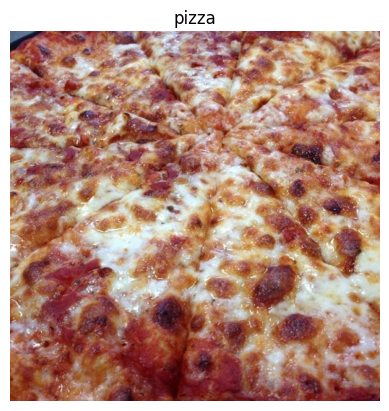

In [19]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [20]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 83, 105, 129],
        [ 87, 109, 133],
        [ 90, 111, 138],
        ...,
        [175, 124, 103],
        [157, 101,  78],
        [137,  80,  53]],

       [[ 83, 105, 129],
        [ 85, 107, 131],
        [ 86, 107, 134],
        ...,
        [180, 131, 114],
        [159, 104,  83],
        [138,  82,  57]],

       [[ 84, 105, 132],
        [ 84, 105, 132],
        [ 83, 104, 131],
        ...,
        [190, 144, 129],
        [163, 112,  95],
        [142,  87,  67]],

       ...,

       [[140,  50,  23],
        [142,  53,  23],
        [141,  54,  24],
        ...,
        [ 97,  32,  40],
        [ 86,  25,  32],
        [ 74,  15,  19]],

       [[141,  51,  24],
        [141,  52,  22],
        [139,  52,  22],
        ...,
        [ 79,  16,  24],
        [ 71,  12,  18],
        [ 60,   3,   9]],

       [[139,  49,  22],
        [137,  48,  18],
        [134,  47,  17],
        ...,
        [ 71,  10,  1